# Exploring the Trends Within Heart Disease and Predicting Diagnosis
# Introduction and Motivation

Heart disease is the leading cause of death in many developed first-world nations. As a result, the research, awareness, and prevention of heart disease garners a lot of attention in both the medical and public scene. Although the fear of heart disease occuring to oneself resides almost exclusively in the older population, the death of a loved one can greatly impact affected families as a whole. From a more personal experience, my grandfather (who's over 80), told me a few years ago that heart disease is his most feared illness, because of how sudden it can occur and how quickly it can kill. Although my grandfather is a very active and healthy person for his age, he has diabetes, which puts him at a greater risk towards heart disease. What he told me has stuck with me ever since, and is why I'm personally interested in exploring more about the topic. 

Created by Yuan Qi on 05/16/2022

**Firstly, here are libraries and imports used in this project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy import stats as st

## The Process

**1. The Dataset Used**

The dataset I used comes from UC Irvine (UCI)'s Machine Learning Repository, and is downloadable from <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease" target="blank">this link</a>. It includes the processed Cleveland heart disease dataset which I used, and was created by the Cleveland Clinic Foundation. The original dataset includes 76 features, but the processed one only includes 14 of them. There are a lot of technical terms involved in this dataset, so I've included links for them listed below if you'd like to learn more about the different features. The 14 features used in the processed database are as follows:
1. age: the age of the patient
2. sex: the sex of the patient
3. <a href="https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain" target="blank">cp</a> : type of chest pain, takes 4 values
    - 1: typical angina
    - 2: atypical angina
    - 3: non-angina pain (i.e. pain not caused by heart disease)
    - 4: asymptomatic (i.e. no symptoms of chest pain)
4. trestbps: resting blood pressure (in mmHg)
5. chol: serum cholesterol level (in mg/dl)
6. fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. <a href="https://www.healthline.com/health/abnormal-ekg#results" target="blank">restecg</a>: resting electrocardiographic results, takes 3 values
    - 0: normal
    - 1: having ST-T wave abnormality
    - 2: probable left ventricular hypertrophy
8. thalach: maximum attained heart rate
9. exang: exercise-induced angina (1 = yes, 0 = no) (i.e. does exercise cause angina?)
10. <a href="https://litfl.com/st-segment-ecg-library/" target="blank">oldpeak</a>: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment, takes 3 values
    - 1: upsloping
    - 2: flat
    - 3: downsloping
12. <a href="https://medlineplus.gov/lab-tests/fluoroscopy/#:~:text=In%20this%20procedure%2C%20fluoroscopy%20shows,Catheters%20are%20thin%2C%20hollow%20tubes." target="blank">ca</a>: number of major vessels (0 - 3) colored by flouroscopy
13. <a href="https://medlineplus.gov/ency/article/000587.htm" target="blank">thal</a>: status of the blood disorder thalassemia, takes 3 values
    - 3: None
    - 6: fixed defect 
    - 7: reversable defect
14. <a href="https://www.mayoclinic.org/tests-procedures/coronary-angiogram/about/pac-20384904" target="blank">Diagnosis of angiographic heart disease status</a>, takes 2 values
    - 0: < 50% artery diameter narrowing
    - 1: > 50% artery diameter narrowing 

**2. Data Loading and Pre-processing**

The data is downloadable from this link, by clicking on "Data Folder" at the top and "processed.cleveland.data" should be listed. The data is comma-separated, so reading it can be done very easily. While doing so, let's give each column a meaningful name to better interpret its attributes. 

In [2]:
columns = ["Age", "Sex", "Chest Pain Type", "Resting Blood Pressure", "Cholesterol Level", "Fasting Blood Sugar", "Resting ECG", "Max Heart Rate", "Exercise Induced Angina", "ST Segment Depression", "Slope of Peak ST", "Major Vessels Colored", "Thalassemia", "Diagnosis"]

# read the file as a csv and assign appropriate column names. 
df = pd.read_csv("processed_cleveland.data", names=columns)
df.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Segment Depression,Slope of Peak ST,Major Vessels Colored,Thalassemia,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Next, let's see how many rows we are working with. 303! Not bad, but pre-processing in the next step may reduce this number. 

In [3]:
df.shape

(303, 14)

Alright, let's now check for any missing data. This step is crucial because bad data can mess with our analysis and needs to be addressed. Let's see which rows, if any, are "missing". Notice how every value in the dataset can be represented by a floating point decimal, so let's see if any rows contain values which aren't. If so, those rows represent some data "missing". 

In [4]:
missing = []
# loop through all rows in the dataframe with df.iterrows()
for i, row in df.iterrows():
    try:
        # check if each value in the row can be turned into a float
        [float(val) for val in list(row)]
    except:
        # if cannot be converted to a float, this row has invalid data.
        missing.append(i)
missing

[87, 166, 192, 266, 287, 302]

It turns out that 6 rows have invalid data. We have a few options to deal with this, but the simplest one is to just remove those 6 rows, since 6 rows is not a lot. An alternative approach is to impute the missing values in each row with the median or mean, in which we replace the missing values with the median or mean of their respective columns. Both approaches are fine with their own benefits and drawbacks. Deleteing the rows can be bad because we are removing data that could be useful, as the more data be have, the better. Imputing could be bad because we could be introducing bias into our data, since we are merely estimating their values. But, for our purposes, both should work fine as we are missing only a small number of rows. 

Additionally, the description given to the diagnosis column is that it should take a value of 0 or 1, but the dataset actually has values between 0 and 4. Fortunately, most of the rows are 0 or 1, so to be safe, let's only keep the rows with a diagnosis of 0 or 1. We don't actually know what a diagnosis value of 2, 3, or 4 represent!

This gives us a total of 214 rows after pre-processing. 

In [5]:
# drop the missing rows
df = df.drop(missing, axis=0)

df = df.loc[df["Diagnosis"] < 2]

# reset the index after dropping rows
df = df.reset_index()
df = df.drop(columns=["index"])
df.shape

(214, 14)

**3. Exploratory Data Analysis**

After preprocessing and tidying up our dataset, we can move onto visualizing and discovering trends in our data, while using statistical approaches to reinforce those trends. This will also allow us to gain a better understanding of our data as a whole, which is important if we want to make meaningful conclusions from it! 

To start off, let's make a correlation heatmap for our dataset, to get a general picture of what to expect. This heatmap represents the Pearson (r) correlation coefficient between each pair of attributes in our dataset. The Pearson correlation coefficient takes a value between -1 and 1, and tells you the linear correlation between two variables. A value of exactly -1 or 1 means the two variables form an exact negative or positive sloped line, respectively. Realistically though, this will never happen, but a value close to either endpoints means there is a strong linear correlation present. 

Note: I also included a "mask" which basically eliminates the top right side of the heatmap, as it is redundant. Other examples of heatmaps you encounter might not do this, and they also might have different color schemes, which can be confusing at first. The important thing is to look at the values which the colors represent. If you'd like to learn about heatmaps more and how to create your own, I'd highly recommend <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="blank">seaborn's heatmap documentation</a>. 

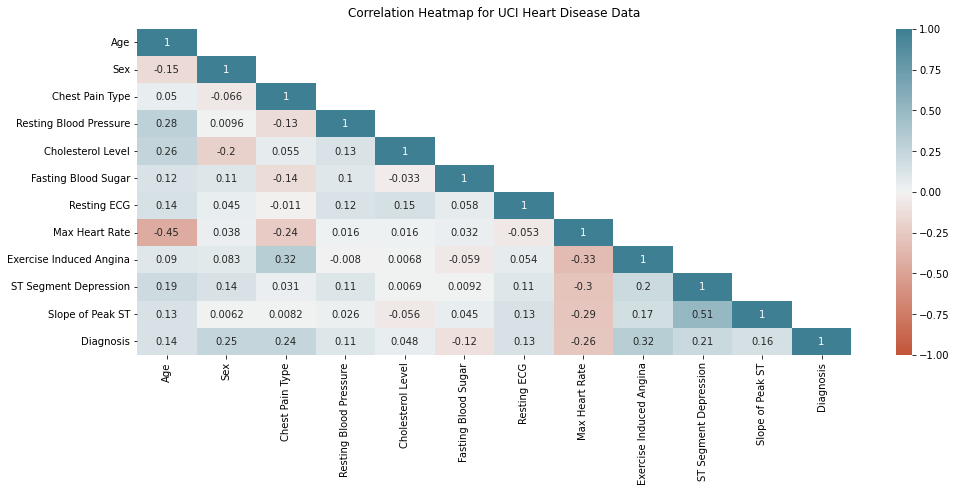

In [6]:
plt.figure(figsize=(16, 6))

# df.corr() finds the correlation matrix for our dataframe
corr = df.corr()

# create a mask to hide the top right portion of the heatmap, whose values are redundant
mask=np.triu(corr)
np.fill_diagonal(mask, False)

# create a visual heatmap using seaborn's heatmap(). We can change the colors of the cmap if we want, but I tend to like this color scheme. 
heatmap = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title("Correlation Heatmap for UCI Heart Disease Data", fontdict={"fontsize":12}, pad=12)

plt.show()

Looking at the heatmap, we can infer a lot of information. We can see which attributes have a strong linear correlation, like for instance, age and max heart rate do, since their Pearson coefficient is -0.45. Also, ST segment depression and slope of peak ST are also linearly correlated, which is unsurprising given their definitions and how they relate. 

To dive deeper and gain more insight, we should further expand on our observations. Focusing on age vs max heart rate, let's see what else we can find.

Let's try plotting the distribution of max heart rates for different year groups. First, we need to group the years into separate numerical bins, since they are numerical data. Grouping data is very useful because it allows us to make observations about a specific group of data and compare it to others. Looking at the unique ages, we can see that there is a range of 48 years, so 4 bins of size = 12 years each would work nicely. We can accomplish this task with pd.groupby() to group our data, and pd.cut() to separate the ages into the bins. More information about using groupby() and bins() can be found <a href="https://www.statology.org/pandas-groupby-bins/" target="blank">here</a>. Let's make our bins and group our data by age to visualize the distribution of max heart rate for each age group. 

In [7]:
# consider the range of unique ages
df["Age"].sort_values().unique()

array([29., 34., 35., 37., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.,
       61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 74., 76.])

In [8]:
# We have a range of 48 years, so let's group them into 4 bins of 12 years each.
labels = ["Ages 29 to 40", "Ages 41 to 52", "Ages 53 to 64", "Ages 65 to 76"]

# manually create the cutoff bins and group the ages using pd.groupby() and pd.cut()
bins = [29, 40, 52, 64, 76]
ages = df.groupby(pd.cut(df["Age"], bins))
age_dfs = []

# save all groups and let's print each group's size just to see!
for i, age in enumerate(ages.groups.keys()):
    curr = ages.get_group(age)
    age_dfs.append(curr)
    print(f"Length of bin {i + 1} ({labels[i]}): {len(curr)}")

Length of bin 1 (Ages 29 to 40): 13
Length of bin 2 (Ages 41 to 52): 83
Length of bin 3 (Ages 53 to 64): 91
Length of bin 4 (Ages 65 to 76): 26


Now, before plotting, we should be able to "predict" what the distributions should look like. Since the r coefficient is negative, this means that heart rate should decrease as the year groups increase. Let's see if this is the case!

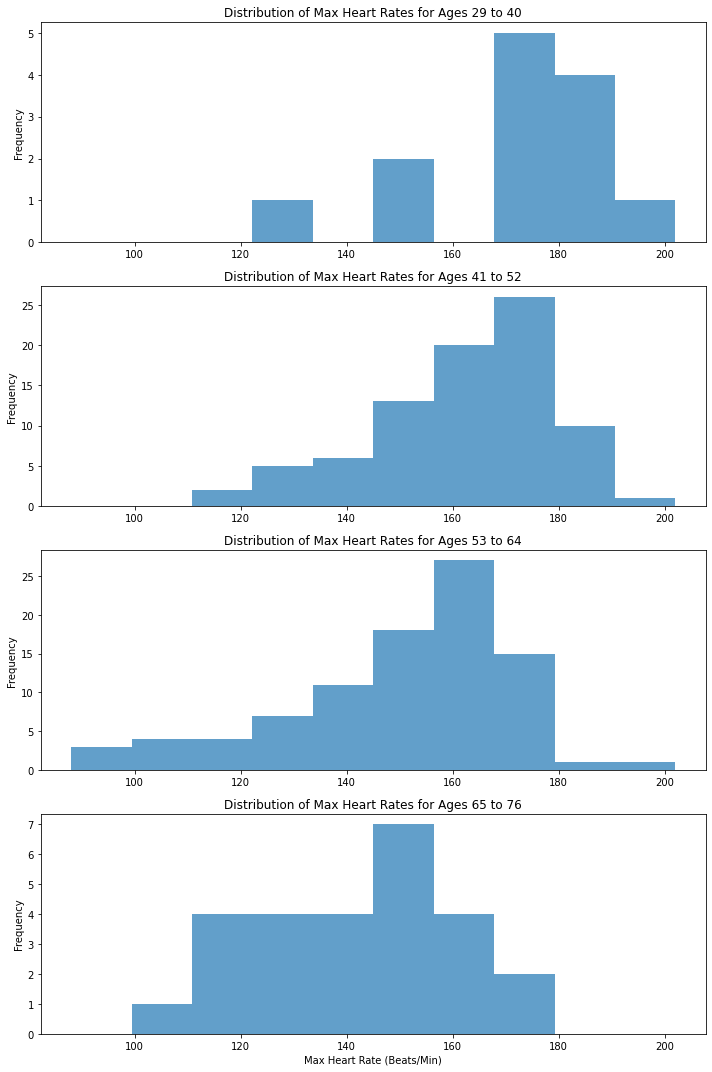

In [9]:
# find the min and max of max heart rate column to keep the x-axis consistent
min = np.min(df["Max Heart Rate"])
max = np.max(df["Max Heart Rate"])

fig, axs = plt.subplots(4, figsize=(10, 15))

# create a histogram for each age
for i in range(4):
    axs[i].hist(age_dfs[i]["Max Heart Rate"], range=(min, max), alpha=0.7, label=labels[i])
    axs[i].set(title=f"Distribution of Max Heart Rates for {labels[i]}", ylabel="Frequency")

plt.xlabel("Max Heart Rate (Beats/Min)")
plt.tight_layout()
plt.show()

As predicted, we can see from the distributions that the average max heart rate goes down as age increases, which is consistent with the r coefficient we found for the values.  

Heart rate can be a telltale sign of cardiovascular health (though not always). An abnormally low heart beat can be a sign of heart disease or a heart attack, while a high one can be a sign of other cardiovascular problems, such as if the heart's pumping functionalities is reduced. Visualizing this relationship between age and max heart rate firsthand is beneficial to better understanding heart health and normal heart rates between different ages.   

Apart from age groups, gender of a person is also relevant in regards to heart disease. For one, there have been <a href="https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women#:~:text=Researchers%20found%20that%20throughout%20life,mass%20index%2C%20and%20physical%20activity" target="blank">numerous studies</a> which show men are much more likely (around twice as much!!) to have heart attacks and heart disease than women. Let's see if we can conclude something similar with our data.

Like with age, we will be using pd.groupby(), but with gender/sex this time. This will allow all men's and women's data to be separated into their own dataframes, so we can make comparisons between them. First, let's plot the proportion of women who got diagnosed with angiographic heart disease to that of men using a double bar plot. 

In [10]:
# Now for gender, group by the sex column
genders = df.groupby(["Sex"])
female_df = genders.get_group(0)
male_df = genders.get_group(1)

len_f = len(female_df)
len_m = len(male_df)

print("Number of Females: " + str(len_f))
print("Number of Males: " + str(len_m))

Number of Females: 80
Number of Males: 134


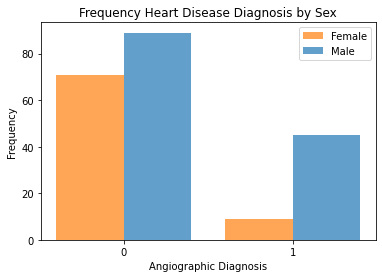

Proportion of women diagnosed with heart disease: 0.11
Proportion of men diagnosed with heart disease: 0.34


In [11]:
# find number of females and males who got diagnosed 
num_diag_f = np.sum(female_df["Diagnosis"])
num_diag_m = np.sum(male_df["Diagnosis"])

# plot using a bar plot!
fig, ax = plt.subplots(1)

x_axis = np.arange(2)

# note that the "x_axis +- 0.2 is there to offset each bar so they don't overlap. It's 0.2 because the width=0.4"
ax.bar(x_axis - 0.2, [len_f - num_diag_f, num_diag_f], width=0.4, color="tab:orange", alpha=0.7, label="Female")
ax.bar(x_axis + 0.2, [len_m - num_diag_m, num_diag_m], width=0.4, color="tab:blue", alpha=0.7, label="Male")

ax.set(title="Frequency Heart Disease Diagnosis by Sex", xlabel="Angiographic Diagnosis", ylabel="Frequency")

plt.xticks(x_axis)
plt.legend()
plt.show()

print(f"Proportion of women diagnosed with heart disease: {num_diag_f/len_f:.2f}")
print(f"Proportion of men diagnosed with heart disease: {num_diag_m/len_m:.2f}")

As we can see, 11% of women in our dataset got diagnosed with angiographic heart disease which is far less than 33% of men. This means that according to our dataset, men are three times more likely to be diagnosed with heart disease than women, which is higher than the value of two times from the research study. This difference could be due to the fact that we need more data to get a more accurate result, since we only have 80 women and 134 men in our dataset. However, there is clearly a higher proportion of men having heart disease than women, as expected.  

As we are already grouped by sex, let's take this opportunity to make further inferences from our data. Let's take a look at the distribution of cholesterol levels between men and women, as our correlation heatmap indicates somewhat of a linear correlation between them. To do this, we can graph the histograms for each on the same plot, since there's only 2 histograms. To visualize their overlap clearly, we can change the transparency level of the colors to 50% (alpha=0.5). Let's see our results! 

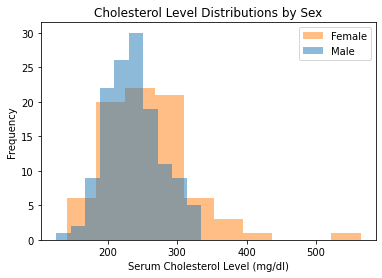

In [12]:
fig, ax = plt.subplots(1)

# plot two histograms in one plot!
ax.hist(female_df["Cholesterol Level"], alpha=0.5, color="tab:orange", label="Female")
ax.hist(male_df["Cholesterol Level"], alpha=0.5, color="tab:blue", label="Male")
ax.set(title="Cholesterol Level Distributions by Sex", xlabel="Serum Cholesterol Level (mg/dl)", ylabel="Frequency")

plt.legend()
plt.show()

Looking at the two distributions, it seems that women generally have a higher cholesterol level than men, though it's pretty close. It's also been shown that a high cholesterol level increases the chances for heart disease, but however, women generally have higher levels of cholesterol but a lower chance of heart disease compared to men, which seems contradictory. This is likely because women's cholesterol levels aren't that much higher than men's, as shown by our plot, but more importantly, cholesterol is not the only determining factor for risk of heart disease!

Next, going back to age vs max heart rate, we saw that as age increased max heart rate decreased. But perhaps the rate of decrease is different for men vs women? Let's find out if their rates are different, by plotting a scatterplot of age vs max heart rate for men and women, and calculating a regression line for each using np.polyfit().  

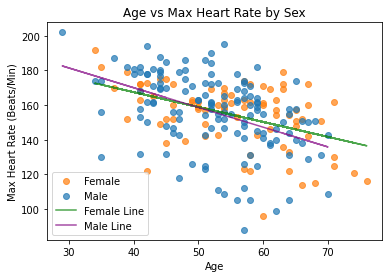

For women, max heart rate drops by 0.859 beats/min per year on average
For men, max heart rate drops by 1.138 beats/min per year on average


In [13]:
fig, ax = plt.subplots(1)

# grab the variables we need
x1, y1 = female_df["Age"], female_df["Max Heart Rate"]
x2, y2 = male_df["Age"], male_df["Max Heart Rate"]

# use a scatterplot to plot the points
ax.scatter(x1, y1, color="tab:orange", alpha=0.7, label="Female")
ax.scatter(x2, y2, color="tab:blue", alpha=0.7, label="Male")
ax.set(title="Age vs Max Heart Rate by Sex", xlabel="Age", ylabel="Max Heart Rate (Beats/Min)")

# find the regression line for each dataset (men and women), and plot them as well
# since there's only one independent variable (age), we can use np.polyfit(). If we had more, we can use sklearn's LinearRegression()
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1+b1, color="green", alpha=0.7, label="Female Line")

m2, b2 = np.polyfit(x2, y2, 1)
ax.plot(x2, m2*x2+b2, color="purple", alpha=0.7, label="Male Line")

plt.legend()
plt.show()

print(f"For women, max heart rate drops by {abs(m1):.3f} beats/min per year on average")
print(f"For men, max heart rate drops by {abs(m2):.3f} beats/min per year on average")

Each regression line minimizes the squared error of its respective dataset, and we can use that line to estimate the max heart rate given an age. To better understand how linear regression work, check out <a href="https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/what-is-a-regression-equation/" target="blank">this article</a>. The slope of the regression lines also give the rate in which max heart rate decreases for every year of age increase. In our case, the slope for men is a bit steeper than that of women's, (-1.138 vs -0.859) but not by much. Let's try to examine the lines further by calculating their r coefficient values.

In [14]:
# find the r-coefficient between age and max heart rate for each dataset
female_r = np.corrcoef(x1, y1)[0, 1]
male_r = np.corrcoef(x2, y2)[0, 1]
print(f"Pearson (r) coef for female dataset: {female_r}")
print(f"Pearson (r) coef for male dataset: {male_r}")

Pearson (r) coef for female dataset: -0.4601464683467836
Pearson (r) coef for male dataset: -0.4454897626779205


As expected, the two values are similar since the slopes of the lines are similar. The coefficents are both negative, which indicates a negative relationship between age and max heart rate (i.e as age increases, max heart rate decreases)

In [15]:
# Using the r coefficient, we can also calculate the r-squared value. 
print(f"R-squared value for female dataset: {female_r**2}")
print(f"R-squared value for male dataset: {male_r**2}")

R-squared value for female dataset: 0.2117347723320175
R-squared value for male dataset: 0.19846112865082993


Using the calculated r coefficient, we can also obtain the r-squared value by squaring our r coefficient. This r-squared value represents the amount of variance that can be explained by our linear model (y = mx + b, using np.polyfit()). In basically all cases, there will be variance present, because the data points won't match exactly to the regression line. The closer they do though, the high the r-squared value, which means that a high amount of variance in the data can be represented by the model. In our case however, the r-squared value is not that high, which means our model only explains a part of the total variance.

**4. Hypothesis Testing using T-test**

Lastly, looking at the graph of our data, it seems that the average value for max heart rate is about the same for men and women. However, according to <a href="https://womenshealth.obgyn.msu.edu/blog/measuring-peak-heart-rate-women#:~:text=%E2%80%9CNow%20we%20know%20for%20the,a%20cardiologist%20at%20Northwestern%20Medicine" target="blank">research</a>, men's max heart rate tends to be higher than women's. To  see if our data follows trend as well, we can use a t-test! To perform one, let's use the ttest_ind() from the scipy.stats library. Note that in order to do this, the two samples have to be independent. In our case they are, since men and women datasets are independent. To learn more about hypothesis testing and t-tests, I encourage reading <a href="https://www.pythonfordatascience.org/independent-samples-t-test-python/" target="blank">this article</a>.

In [16]:
female_samples = female_df["Max Heart Rate"]
male_samples = male_df["Max Heart Rate"]
st.ttest_ind(female_samples, male_samples, alternative="less")

Ttest_indResult(statistic=-0.5568603467159768, pvalue=0.28910511576684805)

We pass our two samples into ttest_ind(), and use "less" as our alternative hypothesis, since we are testing if the max heart rate mean for women is less than that of men. We get a pval = ~0.29, which is greater than a choosen significance level of 0.05. Hence, there is not enough evidence to reject the null hypothesis, which means the average heart beat for women is about the same as that of men. This is not exactly the result we were expecting, so let's print out the sample means to see what's going on. 

In [17]:
print(f"Sample max heart rate mean for women: {np.mean(female_samples):.3f}")
print(f"Sample max heart rate mean for men: {np.mean(male_samples):.3f}")

Sample max heart rate mean for women: 154.375
Sample max heart rate mean for men: 156.015


So, it seems that the men'ss data in our dataset only had a slightly higher mean for max heart rate. This slight increase, however, is not enough evidence to say that it's definitely higher than women's, which is why our t-test concluded that the means were about the same. 

**5. Using Logistic Regression to Predict Angiographic Diagnosis**

Finally, after visualizing our data and gaining a much better understanding of our data, we can use some the insights we gained to create a machine learning model to predict the  angiographic diagnosis of a new patient, given the other attributes. In our case, diagnosis is a classification problem which takes two classes, 0 and 1. For classification problems, a good algorithm to try is logistic regression, so let's give that a shot! Before we do that though, there's just one thing we should change about our data, which is adding one-hot encoding to some of our columns.  

One-hot encoding aims to solve the issue of assigning categorical variables to different integers. The reason this is a problem is because many machine learning algorithms use numbers to indicate significance, in other words, 2 is bigger than 1 and is therefore more important. But for categorical variables, let's say for pets, 2 might mean "cat", and 1 might mean "dog", but that doesn't mean cats are more important than dogs in our model. However, if we leave it like that without one-hot encoding, our machine learning model might interpret it incorrectly as cats being more important than dogs. 

More specifically, one-hot encoding transforms numerical integers into boolean vectors of size n, where n is the number of categories for that variable. To do this with a pandas dataframe, we call the pd.get_dummies() method, which will create n new columns, one for each categorical value, and drop the old column. In our dataset, notice that we have three categorical variables with little meaning if we keep their numerical values unchanged. For example, one of them is chest pain type, which takes an integer from 1-4. However, those integers don't relate to one other at all, so it's better to use one-hot encoding instead. This will result in 4 new columns being created, since there are 4 different values for chest pain type, and the old chest pain type column being dropped. The same will be done with resting ECG and Thalassemia variables, each with their own number of categories.   

However, for transparency's sake, one-hot encoding can have some drawbacks. For one, since we are splitting some variable into more than 1, it can produce more multicollinearity, as more variables will have correlation now. Increasing more columns can also lead to longer training times if we have a large amount of data, but for our small dataset, this won't be an issue. When dealing with a very large dataset with many more features however, this may be an issue. 

In [18]:
# One-hot encoding for each of the three columns. Each of them is dropped and is replaced by new columns of boolean values (0 or 1)
df = pd.get_dummies(df, columns=["Chest Pain Type", "Resting ECG", "Thalassemia"])

# rename columns
df = df.rename(columns={"Chest Pain Type_1.0":"Typical Angina", "Chest Pain Type_2.0":"Atypical Angina", "Chest Pain Type_3.0":"Non-Anginal Pain", "Chest Pain Type_4.0":"Asymptomatic Angina",
                        "Resting ECG_0.0":"Normal ECG", "Resting ECG_1.0":"ST-T Abnormality ECG", "Resting ECG_2.0":"Hypertrophy ECG",
                        "Thalassemia_3.0":"Normal Thalassemia", "Thalassemia_6.0":"Fixed Defect Thalassemia", "Thalassemia_7.0":"Reversable Defect Thalassemia"})
df.head()

,Age,Sex,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Max Heart Rate,Exercise Induced Angina,ST Segment Depression,Slope of Peak ST,Major Vessels Colored,...,Typical Angina,Atypical Angina,Non-Anginal Pain,Asymptomatic Angina,Normal ECG,ST-T Abnormality ECG,Hypertrophy ECG,Normal Thalassemia,Fixed Defect Thalassemia,Reversable Defect Thalassemia
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,...,0,0,0,1,0,0,1,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,...,0,1,0,0,0,0,1,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0


Now, we can train our Logistic Regression model using our dataset. To test the accuracy of our model, we will use K-Folds cross validation, which tests the dataset multiple times with different training and testing slices to ensure every row in our dataset is used for testing and training. This gives a better representation of the accuracy of our model, as opposed to just using one training and testing split. 

In [19]:
y = df["Diagnosis"]
X = df.drop(columns=["Diagnosis"])

# perform logistic regression using sklearn. Increased max_iter from default 100 to 1500 to remove a warning in which the regressor didn't converge
lgr = LogisticRegression(max_iter=1500)

scores = cross_val_score(lgr, X, y, scoring='accuracy', cv=KFold(n_splits=10, random_state=1, shuffle=True), n_jobs=-1)
print(f"Accuracy: {np.mean(scores):.3f}\nStandard Deviation: {np.std(scores):.3f}")

Accuracy: 0.799
Standard Deviation: 0.052


Overall, we got an accuracy of around 80%, which is pretty good. We can also use our model to predict the diagnosis of a new patient given their attributes, as shown below. Obviously this can't be used for medical purposes, but it's interesting to be able to do so with our dataset. For further work, one could train a similar model on a different dataset with different attributes, or perhaps one from a different region (other than Cleveland). Also, the model I used for classification was logistic regression, but there are many other classification models I could've used, like SVMs and decision trees. For a list of all possible models (and classification models), check out <a href="https://scikit-learn.org/stable/supervised_learning.html" target="blank">sklearn's wonderful documentation</a>. 

In [20]:
# split the train and test set, using sklearn's train_test_split(), for a more accurate representation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lgr.fit(X_train, y_train)

# To remove a warning about decimal conversion
import warnings
warnings.filterwarnings("ignore")

# before predicting, convert dataframe/series to numpy array since train_test_split() shuffles indices of dataframes
prediction = np.round(lgr.predict([np.array(X_test)[0]]))
print(f"Predicted Class: {prediction[0]}\nActual Class: {np.array(y_test)[0]}")

Predicted Class: 0
Actual Class: 0


And just a refresher, the predicted class means the corresponding angiographic disease status diagnosis. A value of
* 0 means < 50% artery diameter narrowing
* 1 means > 50% artery diameter narrowing

I've also included a link to more information as to what this means near the beginning of my tutorial, when I went over the different attributes of the dataset.

### Summary

As mentioned, heart disease is an important topic which requires lots of research and investigation. My tutorial aims to provide a great understanding of the trends and factors related to heart disease, such as age, sex, and cholesterol levels, and using data science techniques and statistic analysis (Pearson coefficients, t-test) to prove those points. And to close it off, we trained a logistic regression classifier to predict the diagnosis of angiographic heart disease of new patients. I hope that users reading my tutorial gained a better understanding of heart disease and data science and are able to expand their knowledge to new datasets and different regression models, with an understanding of how and why it works.   